#Problem Statement

The goal is to predict the chances of win of teams using Logistic regression and Decision Tree.

Import packages

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

Read the data of FIFA dataset

In [0]:
read_fifa_stat = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/FIFA%202018%20Statistics.csv')

Storing in data frame object "df"

In [0]:
df = pd.DataFrame(read_fifa_stat)

Read the first five rows of data

In [0]:
print (display(df.head()))

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


None


Read last 5 rows of data

In [0]:
print (display(df.tail()))

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0
127,15-07-2018,Croatia,France,2,61,15,3,8,4,6,1,15,3,83,547,100,13,1,0,0,No,28.0,Final,No,0,NaN,NaN


None


In [0]:
print (display(df.describe()))

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,1st Goal,Goals in PSO,Own goals,Own goal Time
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,94.000000,128.000000,12.0,12.000000
mean,1.320312,49.992188,12.593750,3.914062,5.273438,3.359375,4.718750,1.343750,14.890625,2.726562,82.554688,462.648438,106.664062,13.546875,1.695312,0.015625,0.015625,39.457447,0.203125,1.0,45.833333
std,1.156519,10.444074,5.245827,2.234403,2.409675,2.403195,2.446072,1.193404,4.724262,2.049447,5.933766,151.186311,11.749537,4.619131,1.325454,0.124507,0.124507,24.496506,0.807049,0.0,29.978275
min,0.000000,25.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,67.000000,189.000000,80.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0,12.000000
25%,0.000000,42.000000,9.000000,2.000000,4.000000,1.750000,3.000000,0.000000,11.000000,1.000000,79.000000,351.000000,101.000000,10.000000,1.000000,0.000000,0.000000,18.250000,0.000000,1.0,21.750000
50%,1.000000,50.000000,12.000000,3.500000,5.000000,3.000000,5.000000,1.000000,15.000000,2.000000,83.000000,462.000000,104.500000,13.000000,2.000000,0.000000,0.000000,39.000000,0.000000,1.0,35.000000
75%,2.000000,58.000000,15.000000,5.000000,7.000000,4.000000,6.000000,2.000000,18.000000,4.000000,87.000000,555.250000,109.000000,16.000000,2.000000,0.000000,0.000000,54.750000,0.000000,1.0,75.750000
max,6.000000,75.000000,26.000000,12.000000,11.000000,10.000000,11.000000,5.000000,26.000000,9.000000,94.000000,1137.000000,148.000000,25.000000,6.000000,1.000000,1.000000,90.000000,4.000000,1.0,90.000000


None


In [0]:
print (df.shape)

(128, 27)


In [0]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 27 columns):
Date                      128 non-null object
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
Attempts                  128 non-null int64
On-Target                 128 non-null int64
Off-Target                128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Yellow Card               128 non-null int64
Yellow & Red              128 non-null int64
Red                       128 non-nul

Team didn't score any goals

In [0]:
print (len(df[df['1st Goal'].isnull()]),'times any teams didnt score a goal ')

34 times any teams didnt score a goal 


Team concede own goals

In [0]:
print (len(df[df['Own goals']>0]),'times team sored an own goal')

12 times team sored an own goal


Number of times when team member got both yellow and red card

In [0]:
print (display(df[df['Yellow & Red']!=0]))

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
56,23-06-2018,Germany,Sweden,2,71,16,5,4,7,8,5,15,5,91,699,111,12,0,1,0,Yes,48.0,Group Stage,No,0,NaN,NaN
65,25-06-2018,Russia,Uruguay,0,44,3,1,1,1,2,2,17,5,83,355,98,18,1,1,0,No,NaN,Group Stage,No,0,1.0,23.0


None


When team gets RED card

In [0]:
df[df['Red']!=0]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
28,19-06-2018,Colombia,Japan,1,41,8,3,1,4,3,2,10,4,82,352,93,15,2,0,1,No,39.0,Group Stage,No,0,NaN,NaN
109,03-07-2018,Switzerland,Sweden,0,63,18,4,5,9,11,0,12,2,84,599,103,13,2,0,1,No,NaN,Round of 16,No,0,NaN,NaN


Result of match is ddecided by Penalty Shoot Out

In [0]:
df['Goals in PSO'].value_counts()

0    120
3      4
4      3
2      1
Name: Goals in PSO, dtype: int64

In [0]:
print (len(df[df['Goals in PSO']>0]),'times team score a goal in Penaly Shoot Out')
print ('Or in other words in 4 matches decision to be made by Penalty Shoot Out')

8 times team score a goal in Penaly Shoot Out
Or in other words in 4 matches decision to be made by Penalty Shoot Out


In [0]:
df[df['Goals in PSO']>0]

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
100,01-07-2018,Spain,Russia,1,75,25,9,6,10,6,1,20,0,91,1137,137,5,1,0,0,No,12.0,Round of 16,Yes,3,NaN,NaN
101,01-07-2018,Russia,Spain,1,25,6,1,3,2,5,1,6,9,72,284,146,19,2,0,0,Yes,41.0,Round of 16,Yes,4,1.0,12.0
102,01-07-2018,Croatia,Denmark,1,54,22,7,8,7,5,2,19,2,81,626,132,5,0,0,0,Yes,4.0,Round of 16,Yes,3,NaN,NaN
103,01-07-2018,Denmark,Croatia,1,46,15,3,10,2,4,0,7,7,79,539,135,19,1,0,0,No,1.0,Round of 16,Yes,2,NaN,NaN
110,03-07-2018,Colombia,England,1,48,14,4,7,3,2,1,15,1,78,516,136,23,6,0,0,No,90.0,Round of 16,Yes,3,NaN,NaN
111,03-07-2018,England,Colombia,1,51,16,2,9,5,7,2,24,3,82,571,143,13,2,0,0,Yes,57.0,Round of 16,Yes,4,NaN,NaN
118,07-07-2018,Russia,Croatia,2,38,13,7,4,2,6,1,18,1,69,399,148,25,1,0,0,No,31.0,Quarter Finals,Yes,3,NaN,NaN
119,07-07-2018,Croatia,Russia,2,62,17,3,10,4,8,0,26,5,82,753,139,18,4,0,0,Yes,39.0,Quarter Finals,Yes,4,NaN,NaN


Created a new column "WonMatch" in the dataframe  0 means team lost and 1 means team won

In [0]:
df['WonMatch'] = [0 if x =='No' else 1 for x in df['Man of the Match']]

In [0]:
print (display(df.loc[(df['WonMatch']==1) & (df['Goal Scored']==0),:]))

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time,WonMatch
18,17-06-2018,Germany,Mexico,0,60,25,9,9,7,8,1,17,3,88,595,110,10,2,0,0,Yes,NaN,Group Stage,No,0,NaN,NaN,1
73,26-06-2018,France,Denmark,0,62,11,4,6,1,2,1,11,1,87,669,104,10,0,0,0,Yes,NaN,Group Stage,No,0,NaN,NaN,1


None


Matches played in each stage of World Cup

In [0]:
df['Round'].value_counts()/2

Group Stage       48.0
Round of 16        8.0
Quarter Finals     4.0
Semi- Finals       2.0
3rd Place          1.0
Final              1.0
Name: Round, dtype: float64

In [0]:
print (len(df.loc[(df['Ball Possession %']<=50) & (df['WonMatch']==0),:]))

37


37 number of times team lost the match when ball possession is less than 50%

In [0]:
print (len(df.loc[(df['Ball Possession %']<=50) & (df['WonMatch']==1),:]))

28


28 number of times team won the match when ball possession is less than 50%

In [0]:
print (len(df.loc[(df['Ball Possession %']>50) & (df['WonMatch']==0),:]))

27


27 number of times team lost the match when ball possession is more than 50%

In [0]:
print (len(df.loc[(df['Ball Possession %']>50) & (df['WonMatch']==1),:]))

36


36 number of times team lost the match when ball possession is more than 50%

Teams which played in FIFA World Cup 2018

In [0]:
print (df['Team'].sort_values().unique(),'are the teams qualified for FIFA World Cup 2018')

['Argentina' 'Australia' 'Belgium' 'Brazil' 'Colombia' 'Costa Rica'
 'Croatia' 'Denmark' 'Egypt' 'England' 'France' 'Germany' 'Iceland' 'Iran'
 'Japan' 'Korea Republic' 'Mexico' 'Morocco' 'Nigeria' 'Panama' 'Peru'
 'Poland' 'Portugal' 'Russia' 'Saudi Arabia' 'Senegal' 'Serbia' 'Spain'
 'Sweden' 'Switzerland' 'Tunisia' 'Uruguay'] are the teams qualified for FIFA World Cup 2018


Number of matches played by each team in world cup

In [0]:
for i in df['Team'].sort_values().unique():
  print(i, 'team played',len(df[((df['Team']==i) | (df['Opponent']==i)) & (df['WonMatch']==1)]),'matches')

Argentina team played 4 matches
Australia team played 3 matches
Belgium team played 7 matches
Brazil team played 5 matches
Colombia team played 4 matches
Costa Rica team played 3 matches
Croatia team played 7 matches
Denmark team played 4 matches
Egypt team played 3 matches
England team played 7 matches
France team played 7 matches
Germany team played 3 matches
Iceland team played 3 matches
Iran team played 3 matches
Japan team played 4 matches
Korea Republic team played 3 matches
Mexico team played 4 matches
Morocco team played 3 matches
Nigeria team played 3 matches
Panama team played 3 matches
Peru team played 3 matches
Poland team played 3 matches
Portugal team played 4 matches
Russia team played 5 matches
Saudi Arabia team played 3 matches
Senegal team played 3 matches
Serbia team played 3 matches
Spain team played 4 matches
Sweden team played 5 matches
Switzerland team played 4 matches
Tunisia team played 3 matches
Uruguay team played 5 matches


In [0]:
for i in df['Team'].sort_values().unique():
  print(i, 'team won',len(df[(df['Team']==i) & (df['WonMatch']==1)]),'matches')

Argentina team won 1 matches
Australia team won 0 matches
Belgium team won 6 matches
Brazil team won 4 matches
Colombia team won 2 matches
Costa Rica team won 0 matches
Croatia team won 5 matches
Denmark team won 2 matches
Egypt team won 1 matches
England team won 4 matches
France team won 7 matches
Germany team won 2 matches
Iceland team won 2 matches
Iran team won 1 matches
Japan team won 1 matches
Korea Republic team won 1 matches
Mexico team won 1 matches
Morocco team won 0 matches
Nigeria team won 1 matches
Panama team won 0 matches
Peru team won 1 matches
Poland team won 1 matches
Portugal team won 2 matches
Russia team won 3 matches
Saudi Arabia team won 0 matches
Senegal team won 2 matches
Serbia team won 1 matches
Spain team won 3 matches
Sweden team won 3 matches
Switzerland team won 2 matches
Tunisia team won 1 matches
Uruguay team won 4 matches


In how many matches, how many number of goals scored

1    45
2    35
0    33
3    10
5     2
4     2
6     1
Name: Goal Scored, dtype: int64

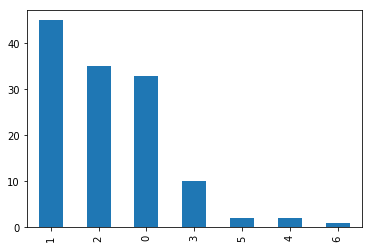

In [0]:
df['Goal Scored'].value_counts().plot.bar()
df['Goal Scored'].value_counts()

Team score goal and won the match

In [0]:
for i in df['Goal Scored'].sort_values().unique():
  print (i,'number of goals scored in',len(df[df['Goal Scored']==i]))

0 number of goals scored in 33
1 number of goals scored in 45
2 number of goals scored in 35
3 number of goals scored in 10
4 number of goals scored in 2
5 number of goals scored in 2
6 number of goals scored in 1


Number of matches played by the team in graphical representation

Text(0, 0.5, 'Number of matches played')

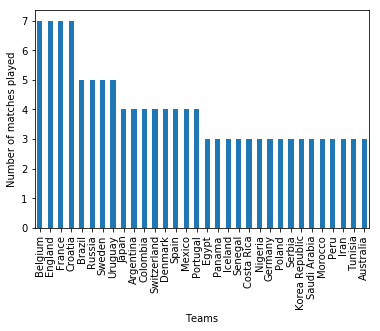

In [0]:
for i in df['Team'].sort_values().unique():
   df['Team'].value_counts().plot.bar()
plt.xlabel('Teams')
plt.ylabel('Number of matches played')

Create new column: - "Winning Team"

In [0]:
df['Winning Team'] = np.nan
df.head()

for i in range (0,128):
    x=df['WonMatch'][i]
    if x==1:
      df['Winning Team'][i] = df['Team'][i]
    else:
      df['Winning Team'][i] = df['Opponent'][i]
      
print (df.head())      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


         Date          Team      Opponent  ...  Own goal Time  WonMatch  Winning Team
0  14-06-2018        Russia  Saudi Arabia  ...            NaN         1        Russia
1  14-06-2018  Saudi Arabia        Russia  ...            NaN         0        Russia
2  15-06-2018         Egypt       Uruguay  ...            NaN         0       Uruguay
3  15-06-2018       Uruguay         Egypt  ...            NaN         1       Uruguay
4  15-06-2018       Morocco          Iran  ...           90.0         0          Iran

[5 rows x 29 columns]


Text(0, 0.5, 'Number of matches won')

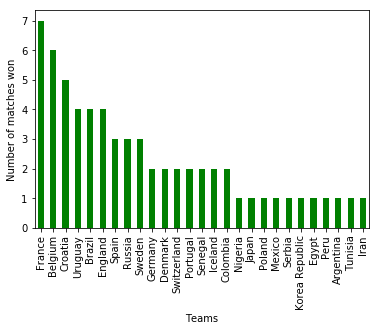

In [0]:
(df['Winning Team'].value_counts()/2).plot.bar(color='Green')
plt.xlabel('Teams')
plt.ylabel('Number of matches won')

After scoring goal team won the match

In [0]:
for i in range (1,7):
  print ('goal scored',i,'',(len(df.loc[(df['Goal Scored']==i) & (df['WonMatch']==1),:])))

goal scored 1  23
goal scored 2  26
goal scored 3  8
goal scored 4  2
goal scored 5  2
goal scored 6  1


After scoring a goal team lost the match

In [0]:
for i in range (1,7):
  print ('goal scored',i,'',(len(df.loc[(df['Goal Scored']==i) & (df['WonMatch']==0),:])))

goal scored 1  22
goal scored 2  9
goal scored 3  2
goal scored 4  0
goal scored 5  0
goal scored 6  0


Numbers of Attempts taken by each team in a World Cup

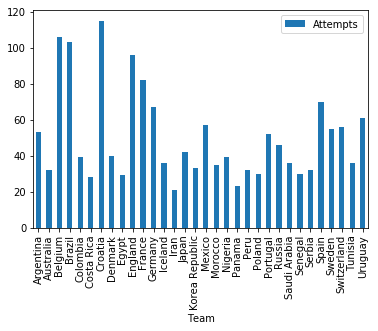

In [0]:
df1 = pd.DataFrame(columns = ['Team','Attempts'])

for i in df['Team'].sort_values().unique():
  j = i
  k = df.loc[df['Team'] == i, 'Attempts'].sum()
  df3 = pd.DataFrame({'Team':[j],'Attempts':[k]})
  frames = [df1,df3]
  df1 = pd.concat(frames)


df1.plot(x = 'Team',y ='Attempts',kind = 'bar')

In [0]:
for i in df['Team'].sort_values().unique():
  print (i,'has taken',df.loc[df['Team'] == i, 'Attempts'].sum(),'shoots in World Cup')

Argentina has taken 53 shoots in World Cup
Australia has taken 32 shoots in World Cup
Belgium has taken 106 shoots in World Cup
Brazil has taken 103 shoots in World Cup
Colombia has taken 39 shoots in World Cup
Costa Rica has taken 28 shoots in World Cup
Croatia has taken 115 shoots in World Cup
Denmark has taken 40 shoots in World Cup
Egypt has taken 29 shoots in World Cup
England has taken 96 shoots in World Cup
France has taken 82 shoots in World Cup
Germany has taken 67 shoots in World Cup
Iceland has taken 36 shoots in World Cup
Iran has taken 21 shoots in World Cup
Japan has taken 42 shoots in World Cup
Korea Republic has taken 33 shoots in World Cup
Mexico has taken 57 shoots in World Cup
Morocco has taken 35 shoots in World Cup
Nigeria has taken 39 shoots in World Cup
Panama has taken 23 shoots in World Cup
Peru has taken 32 shoots in World Cup
Poland has taken 30 shoots in World Cup
Portugal has taken 52 shoots in World Cup
Russia has taken 46 shoots in World Cup
Saudi Arabia 

In [0]:
print (df['Attempts'].sum(),'number of attempts taken by a player in the World Cup')
print (df['Attempts'].max(),'maximum number of attempts taken by a team in a single match')
print (df['Attempts'].min(),'minimum number of attempts taken by a team in a single match')

1612 number of attempts taken by a player in the World Cup
26 maximum number of attempts taken by a team in a single match
3 minimum number of attempts taken by a team in a single match


Number of shoots "OFF-Target" taken by each team in the World Cup

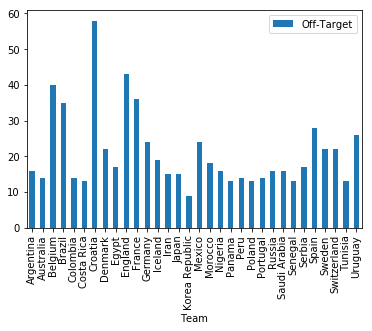

In [0]:
df2 = pd.DataFrame(columns = ['Team','Off-Target'])

for i in df['Team'].sort_values().unique():
  j = i
  k = df.loc[df['Team'] == i, 'Off-Target'].sum()
  df3 = pd.DataFrame({'Team':[j],'Off-Target':[k]})
  frames = [df2,df3]
  df2 = pd.concat(frames)


df2.plot(x = 'Team',y ='Off-Target',kind = 'bar')

In [0]:
for i in df['Team'].sort_values().unique():
  print (i,'has taken',df.loc[df['Team'] == i, 'Off-Target'].sum(),'shoots in World Cup which is OFF-Target')

Argentina has taken 16 shoots in World Cup which is OFF-Target
Australia has taken 14 shoots in World Cup which is OFF-Target
Belgium has taken 40 shoots in World Cup which is OFF-Target
Brazil has taken 35 shoots in World Cup which is OFF-Target
Colombia has taken 14 shoots in World Cup which is OFF-Target
Costa Rica has taken 13 shoots in World Cup which is OFF-Target
Croatia has taken 58 shoots in World Cup which is OFF-Target
Denmark has taken 22 shoots in World Cup which is OFF-Target
Egypt has taken 17 shoots in World Cup which is OFF-Target
England has taken 43 shoots in World Cup which is OFF-Target
France has taken 36 shoots in World Cup which is OFF-Target
Germany has taken 24 shoots in World Cup which is OFF-Target
Iceland has taken 19 shoots in World Cup which is OFF-Target
Iran has taken 15 shoots in World Cup which is OFF-Target
Japan has taken 15 shoots in World Cup which is OFF-Target
Korea Republic has taken 9 shoots in World Cup which is OFF-Target
Mexico has taken 24

Number of shoots "ON-Target" taken by each team in the World Cup

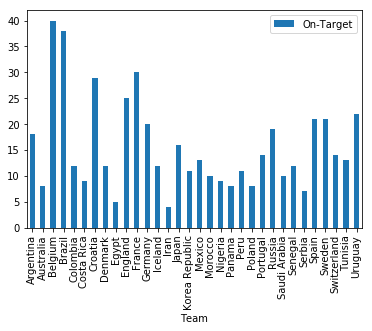

In [0]:
df2 = pd.DataFrame(columns = ['Team','On-Target'])

for i in df['Team'].sort_values().unique():
  j = i
  k = df.loc[df['Team'] == i, 'On-Target'].sum()
  df3 = pd.DataFrame({'Team':[j],'On-Target':[k]})
  frames = [df2,df3]
  df2 = pd.concat(frames)


df2.plot(x = 'Team',y ='On-Target',kind = 'bar')

In [0]:
for i in df['Team'].sort_values().unique():
  print (i,'has taken',df.loc[df['Team'] == i, 'On-Target'].sum(),'shoots in World Cup which is On-Target')

Argentina has taken 18 shoots in World Cup which is On-Target
Australia has taken 8 shoots in World Cup which is On-Target
Belgium has taken 40 shoots in World Cup which is On-Target
Brazil has taken 38 shoots in World Cup which is On-Target
Colombia has taken 12 shoots in World Cup which is On-Target
Costa Rica has taken 9 shoots in World Cup which is On-Target
Croatia has taken 29 shoots in World Cup which is On-Target
Denmark has taken 12 shoots in World Cup which is On-Target
Egypt has taken 5 shoots in World Cup which is On-Target
England has taken 25 shoots in World Cup which is On-Target
France has taken 30 shoots in World Cup which is On-Target
Germany has taken 20 shoots in World Cup which is On-Target
Iceland has taken 12 shoots in World Cup which is On-Target
Iran has taken 4 shoots in World Cup which is On-Target
Japan has taken 16 shoots in World Cup which is On-Target
Korea Republic has taken 11 shoots in World Cup which is On-Target
Mexico has taken 13 shoots in World Cu

Number of free kicks taken by each team in the World Cup

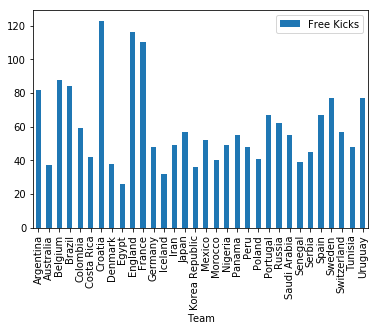

In [0]:
df2 = pd.DataFrame(columns = ['Team','Free Kicks'])

for i in df['Team'].sort_values().unique():
  j = i
  k = df.loc[df['Team'] == i, 'Free Kicks'].sum()
  df3 = pd.DataFrame({'Team':[j],'Free Kicks':[k]})
  frames = [df2,df3]
  df2 = pd.concat(frames)


df2.plot(x = 'Team',y ='Free Kicks',kind = 'bar')

In [0]:
for i in df['Team'].sort_values().unique():
  print (i,'has taken',df.loc[df['Team'] == i, 'Free Kicks'].sum(),'Free-kicks in World Cup')

Argentina has taken 82 Free-kicks in World Cup
Australia has taken 37 Free-kicks in World Cup
Belgium has taken 88 Free-kicks in World Cup
Brazil has taken 84 Free-kicks in World Cup
Colombia has taken 59 Free-kicks in World Cup
Costa Rica has taken 42 Free-kicks in World Cup
Croatia has taken 123 Free-kicks in World Cup
Denmark has taken 38 Free-kicks in World Cup
Egypt has taken 26 Free-kicks in World Cup
England has taken 116 Free-kicks in World Cup
France has taken 110 Free-kicks in World Cup
Germany has taken 48 Free-kicks in World Cup
Iceland has taken 32 Free-kicks in World Cup
Iran has taken 49 Free-kicks in World Cup
Japan has taken 57 Free-kicks in World Cup
Korea Republic has taken 36 Free-kicks in World Cup
Mexico has taken 52 Free-kicks in World Cup
Morocco has taken 40 Free-kicks in World Cup
Nigeria has taken 49 Free-kicks in World Cup
Panama has taken 55 Free-kicks in World Cup
Peru has taken 48 Free-kicks in World Cup
Poland has taken 41 Free-kicks in World Cup
Portuga

Number of shoot taken by a team which is On-Target

In [0]:
print ('total number of shoots taken by a team in a World Cup which is On-Target: -',df['On-Target'].sum())
print ('maximum number of shoots taken by a team in a single match which in On-Target: -',df['On-Target'].max())
print ('minimum number of shoots taken by a team in a single match which is On-Target',df['On-Target'].min())

total number of shoots taken by a team in a World Cup which is On-Target: - 501
maximum number of shoots taken by a team in a single match which in On-Target: - 12
minimum number of shoots taken by a team in a single match which is On-Target 0


Number of shoot taken by a team which is Off-Target

In [0]:
print ('total number of shoots taken by a team in World Cup which is OFF-Target',df['Off-Target'].sum())
print ('maximum number of shoots taken by a team in single match which is OFF-Target',df['Off-Target'].max())
print ('minimum number of shoots taken by a team in single match which is OFF-Target',df['Off-Target'].min())

total number of shoots taken by a team in World Cup which is OFF-Target 675
maximum number of shoots taken by a team in single match which is OFF-Target 11
minimum number of shoots taken by a team in single match which is OFF-Target 1


Total Number of goals scored in a World Cup

In [0]:
print ('Total number of goals scored in a World Cup: -',df['Goal Scored'].sum())
print ('Maximum number of goals scored by a team in a single match: -',df['Goal Scored'].max())

Total number of goals scored in a World Cup: - 169
Maximum number of goals scored by a team in a single match: - 6


Number of fouls committed by a team in a World Cup

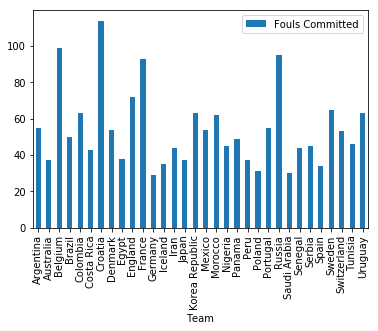

In [0]:
df2 = pd.DataFrame(columns = ['Team','Fouls Committed'])

for i in df['Team'].sort_values().unique():
  j = i
  k = df.loc[df['Team'] == i, 'Fouls Committed'].sum()
  df3 = pd.DataFrame({'Team':[j],'Fouls Committed':[k]})
  frames = [df2,df3]
  df2 = pd.concat(frames)


df2.plot(x = 'Team',y ='Fouls Committed',kind = 'bar')

Number of goals scored by each team in a World Cup

In [0]:
for i in df['Team'].sort_values().unique():
  print (i,'scored',df.loc[df['Team'] == i, 'Goal Scored'].sum(),'goals')

Argentina scored 6 goals
Australia scored 2 goals
Belgium scored 16 goals
Brazil scored 8 goals
Colombia scored 6 goals
Costa Rica scored 2 goals
Croatia scored 14 goals
Denmark scored 3 goals
Egypt scored 2 goals
England scored 12 goals
France scored 14 goals
Germany scored 2 goals
Iceland scored 2 goals
Iran scored 2 goals
Japan scored 6 goals
Korea Republic scored 3 goals
Mexico scored 3 goals
Morocco scored 2 goals
Nigeria scored 3 goals
Panama scored 2 goals
Peru scored 2 goals
Poland scored 2 goals
Portugal scored 6 goals
Russia scored 11 goals
Saudi Arabia scored 2 goals
Senegal scored 4 goals
Serbia scored 2 goals
Spain scored 7 goals
Sweden scored 6 goals
Switzerland scored 5 goals
Tunisia scored 5 goals
Uruguay scored 7 goals


Create new column total cards

In [0]:
df['total cards']= df['Red'] + df['Yellow & Red'] + df['Yellow Card']

In [0]:
df.drop(columns=['Attempts','Off-Target','Round'],axis=1,inplace=True)

Dropped 4 more columns

In [0]:
df.drop(columns=['Red','Yellow & Red','Yellow Card','Date'], axis=1, inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 23 columns):
Team                      128 non-null object
Opponent                  128 non-null object
Goal Scored               128 non-null int64
Ball Possession %         128 non-null int64
On-Target                 128 non-null int64
Blocked                   128 non-null int64
Corners                   128 non-null int64
Offsides                  128 non-null int64
Free Kicks                128 non-null int64
Saves                     128 non-null int64
Pass Accuracy %           128 non-null int64
Passes                    128 non-null int64
Distance Covered (Kms)    128 non-null int64
Fouls Committed           128 non-null int64
Man of the Match          128 non-null object
1st Goal                  94 non-null float64
PSO                       128 non-null object
Goals in PSO              128 non-null int64
Own goals                 12 non-null float64
Own goal Time             12 non-n

In [0]:
print ('Total number of free kickes taken in a World Cup: -',df['Free Kicks'].sum())
print ( 'maximum number of free kicks taken by any team in a match: - ',df['Free Kicks'].max())
print ( 'minimum number of free kicks taken by any team in a match: - ',df['Free Kicks'].min())

Total number of free kickes taken in a World Cup: - 1906
maximum number of free kicks taken by any team in a match: -  26
minimum number of free kicks taken by any team in a match: -  5


In [0]:
print ('maximum distance covered by a team members in a single match: - ',df['Distance Covered (Kms)'].max())
print ('minimum distance covered by a team members in a single match: - ',df['Distance Covered (Kms)'].min())

maximum distance covered by a team members in a single match: -  148
minimum distance covered by a team members in a single match: -  80


In [0]:
print ('Total number of passes in a World Cup: -',df['Passes'].sum())
print ('maximum passes by a team in a single match: -',df['Passes'].max())
print ('minimum passes by a team in a single match: -',df['Passes'].min())

Total number of passes in a World Cup: - 59219
maximum passes by a team in a single match: - 1137
minimum passes by a team in a single match: - 189


In [0]:
print ('maximum pass accuracy % by a team in a single match: -',df['Pass Accuracy %'].max())
print ('minimum pass accuracy % by a team in a single match: -',df['Pass Accuracy %'].min())

maximum pass accuracy % by a team in a single match: - 94
minimum pass accuracy % by a team in a single match: - 67


In [0]:
print ('total number of fouls committed in World Cup: - ',df['Fouls Committed'].sum())
print ('maximum number of fouls committed by a team in a single match: - ',df['Fouls Committed'].max())
print ('minimum time taken by a team to score 1st goal in a match: - ',df['1st Goal'].min(),'minute')

total number of fouls committed in World Cup: -  1734
maximum number of fouls committed by a team in a single match: -  25
minimum time taken by a team to score 1st goal in a match: -  1.0 minute


In [0]:
print ('Total number of saves in the World cup: -',df['Saves'].sum())
print ('maximum number of saves done by a team in a single match: -',df['Saves'].max())

Total number of saves in the World cup: - 349
maximum number of saves done by a team in a single match: - 9


In [0]:
print ('maximum number of Offsides by a team in a single match: -',df['Offsides'].max())

maximum number of Offsides by a team in a single match: - 5


In [0]:
df.drop(columns=['Free Kicks','Distance Covered (Kms)','Passes','Pass Accuracy %','Fouls Committed','1st Goal'], axis=1, inplace=True)

In [0]:
df.drop(columns=['Offsides','Blocked','Corners','PSO','total cards','Team','Opponent','Goals in PSO','Own goals','Own goal Time'], axis=1, inplace=True)

In [0]:
print (display(df.head()))

,Goal Scored,Ball Possession %,On-Target,Saves,Man of the Match,WonMatch,Winning Team
0,5,40,7,0,Yes,1,Russia
1,0,60,0,2,No,0,Russia
2,0,43,3,3,No,0,Uruguay
3,1,57,4,3,Yes,1,Uruguay
4,0,64,3,2,No,0,Iran


None


Text(0.5, 1.0, 'Pair Plot')

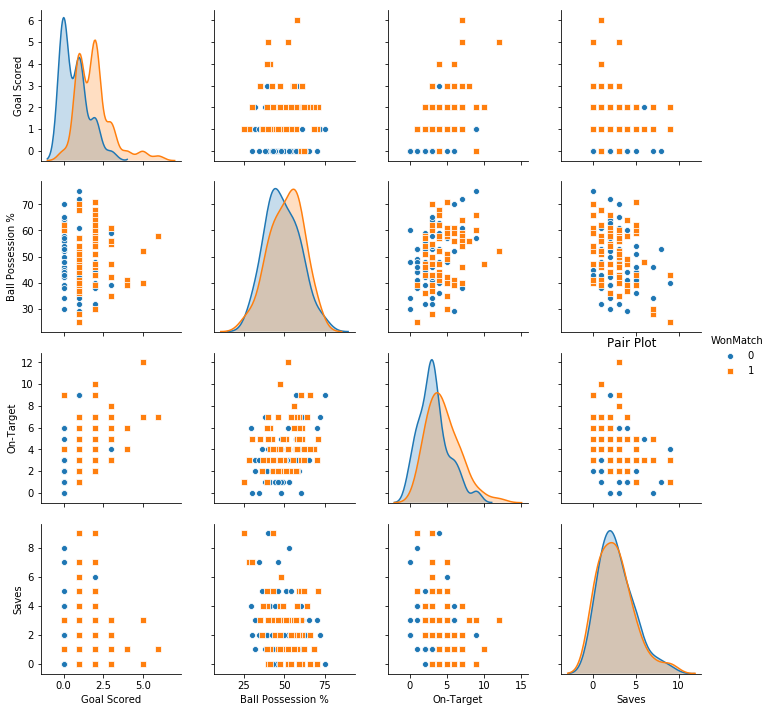

In [0]:
sns.pairplot(df[["Goal Scored","Ball Possession %","On-Target","Saves","WonMatch"]],vars = ["Goal Scored","Ball Possession %","On-Target","Saves"],hue="WonMatch", dropna=True,markers=["o", "s"])
plt.title('Pair Plot')

In [0]:
df.drop(columns=['Man of the Match'],axis=1,inplace=True)

In [0]:
X = df.loc[:,df.columns != 'WonMatch']
print (display(X.head()))

,Goal Scored,Ball Possession %,On-Target,Saves
0,5,40,7,0
1,0,60,0,2
2,0,43,3,3
3,1,57,4,3
4,0,64,3,2


None


In [0]:
df.drop(columns=['Winning Team'],axis=1,inplace=True)

In [0]:
y = df.WonMatch
print (y.head())

0    1
1    0
2    0
3    1
4    0
Name: WonMatch, dtype: int64


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [0]:
print(X_train.shape)
print(y_train.shape)

(115, 4)
(115,)


In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_train = logreg.predict(X_train) 

In [0]:
y_pred_test = logreg.predict(X_test) 

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for test data is: 0.8461538461538461


In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))

Accuracy score for train data is: 0.6956521739130435


In [0]:
print (display(df.head()))

,Goal Scored,Ball Possession %,On-Target,Saves,WonMatch
0,5,40,7,0,1
1,0,60,0,2,0
2,0,43,3,3,0
3,1,57,4,3,1
4,0,64,3,2,0


None


###Model Evaluation using confusion matrix

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))
print(confusion_matrix)

   0  1
0  5  1
1  1  6


In [0]:
print ('---------Test------------')
confusion_matrix.index = ['Actual Loss','Actual Win']
confusion_matrix.columns = ['Predicted Loss','Predicted Win']
print(confusion_matrix)

---------Test------------
             Predicted Loss  Predicted Win
Actual Loss               5              1
Actual Win                1              6


Correct Predictions: -    5+6=11
Incorrect Predictions: - 1+1=2

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix1 = pd.DataFrame(confusion_matrix(y_train, y_pred_train))
print(confusion_matrix1)

    0   1
0  46  12
1  23  34


In [0]:
confusion_matrix1.index = ['Actual Loss','Actual Win']
confusion_matrix1.columns = ['Predicted Loss','Predicted Win']
print(confusion_matrix1)

             Predicted Loss  Predicted Win
Actual Loss              46             12
Actual Win               23             34


Correct Predictions: 46+34=80 and Incorrect Predictions: 23+12=35

In [0]:
df1 = pd.DataFrame(df)
print (display(df1.head()))

,Goal Scored,Ball Possession %,On-Target,Saves,WonMatch
0,5,40,7,0,1
1,0,60,0,2,0
2,0,43,3,3,0
3,1,57,4,3,1
4,0,64,3,2,0


None


In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [0]:
model = tree.DecisionTreeClassifier(random_state = 0)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

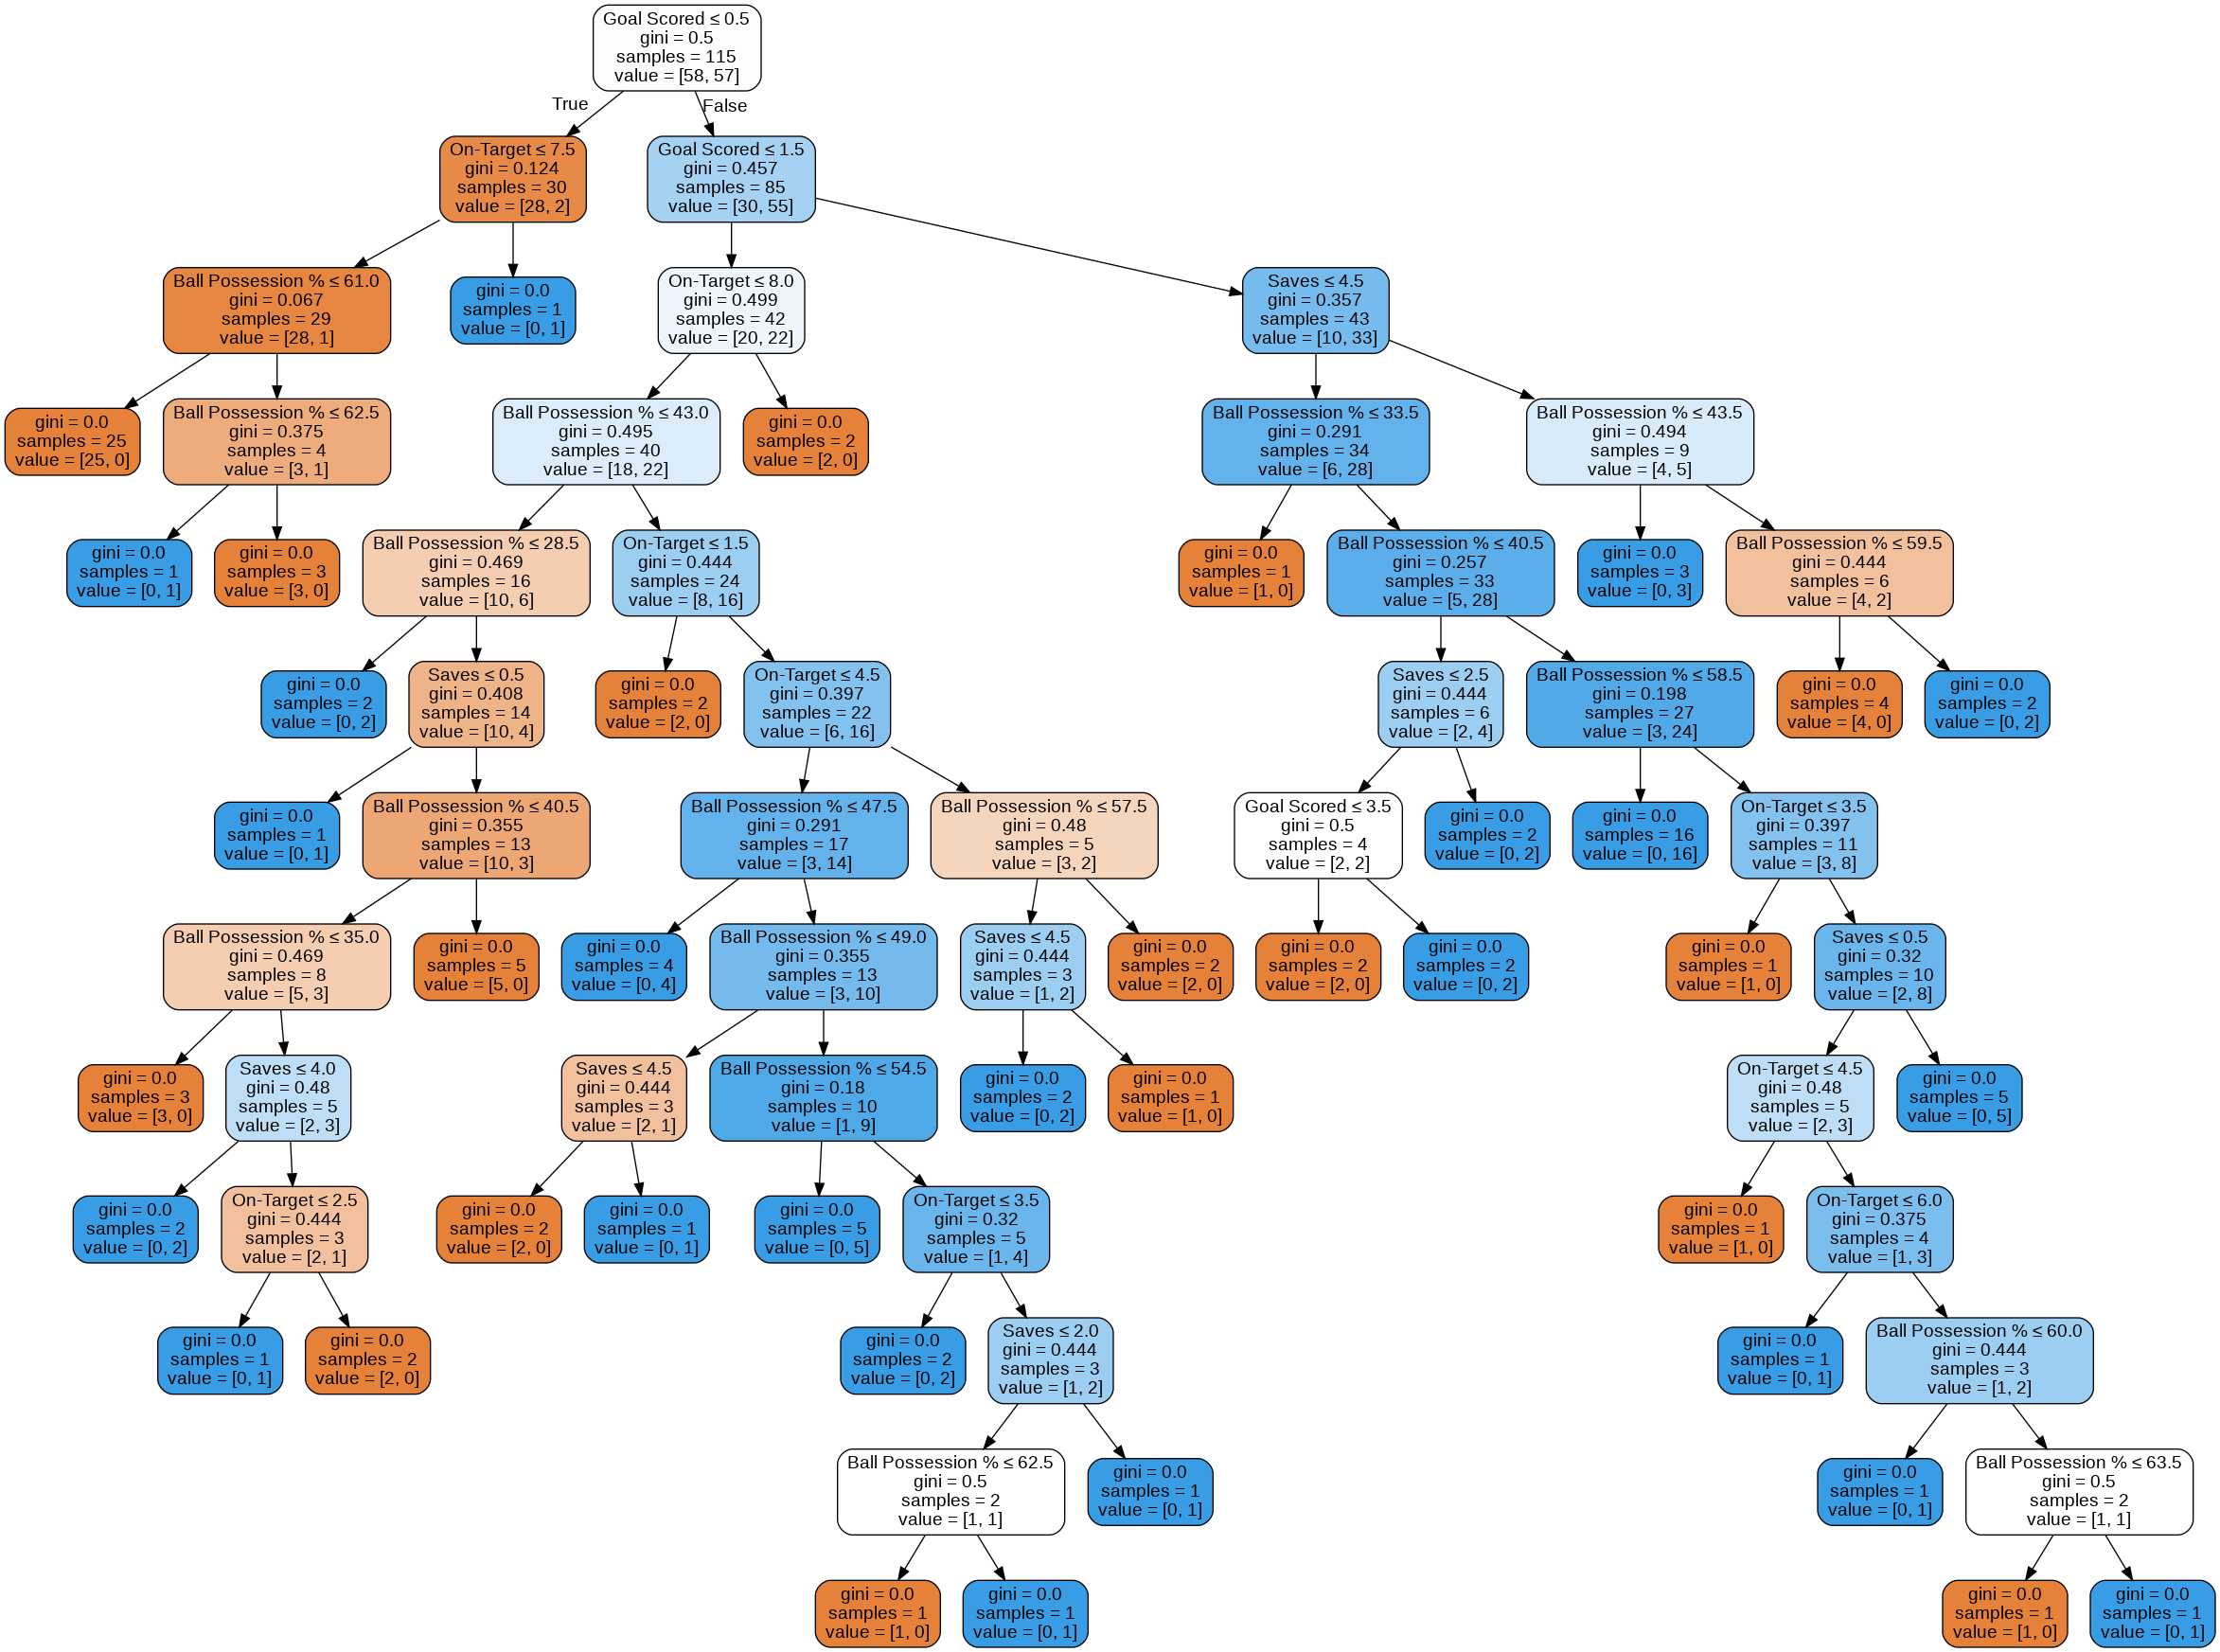

In [0]:
import pydotplus
from IPython.display import Image

dot_tree = tree.export_graphviz(model, out_file=None,filled=True, rounded=True, 
                                special_characters=True, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_tree)  

Image(graph.create_png())